## Imports<a id='3.3_Imports'></a>

In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from library1.sb_utils import save_file

## Load The Data<a id='3.4_Load_The_Data'></a>

In [2]:
bc_data = pd.read_csv('/Users/sharanaravindh/Desktop/springboard/Github repository/Capstone-Project-1-Breast-Cancer-Prognosis/Data/breast_cancer_cleaned.csv')

In [3]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 321 non-null    int64  
 1   Gender              321 non-null    object 
 2   Protein1            321 non-null    float64
 3   Protein2            321 non-null    float64
 4   Protein3            321 non-null    float64
 5   Protein4            321 non-null    float64
 6   Tumour_Stage        321 non-null    int64  
 7   Histology           321 non-null    object 
 8   ER status           321 non-null    object 
 9   PR status           321 non-null    object 
 10  HER2 status         321 non-null    object 
 11  Surgery_type        321 non-null    object 
 12  Date_of_Surgery     321 non-null    object 
 13  Date_of_Last_Visit  321 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 37.7+ KB

In [4]:
bc_data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-05-20,2018-08-26,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-04-26,2019-01-25,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2018-08-24,2020-04-08,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2018-11-16,2020-07-28,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2018-12-12,2019-01-05,Alive


In [5]:
bc_data.describe()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,58.875389,-0.026479,0.954563,-0.093279,0.008813,2.052960
std,12.929982,0.546689,0.909635,0.587981,0.622491,0.656933
min,29.000000,-2.144600,-0.978730,-1.627400,-2.025500,1.000000
25%,49.000000,-0.361650,0.368840,-0.531360,-0.378070,2.000000
50%,58.000000,0.005649,1.000300,-0.177200,0.040511,2.000000
75%,68.000000,0.336530,1.633200,0.275630,0.428860,2.000000
max,90.000000,1.593600,3.402200,2.193400,1.629900,3.000000


## Explore The Data<a id='3.5_Explore_The_Data'></a>

####   Age vs. Patient Status

<Axes: xlabel='Patient_Status', ylabel='Age'>

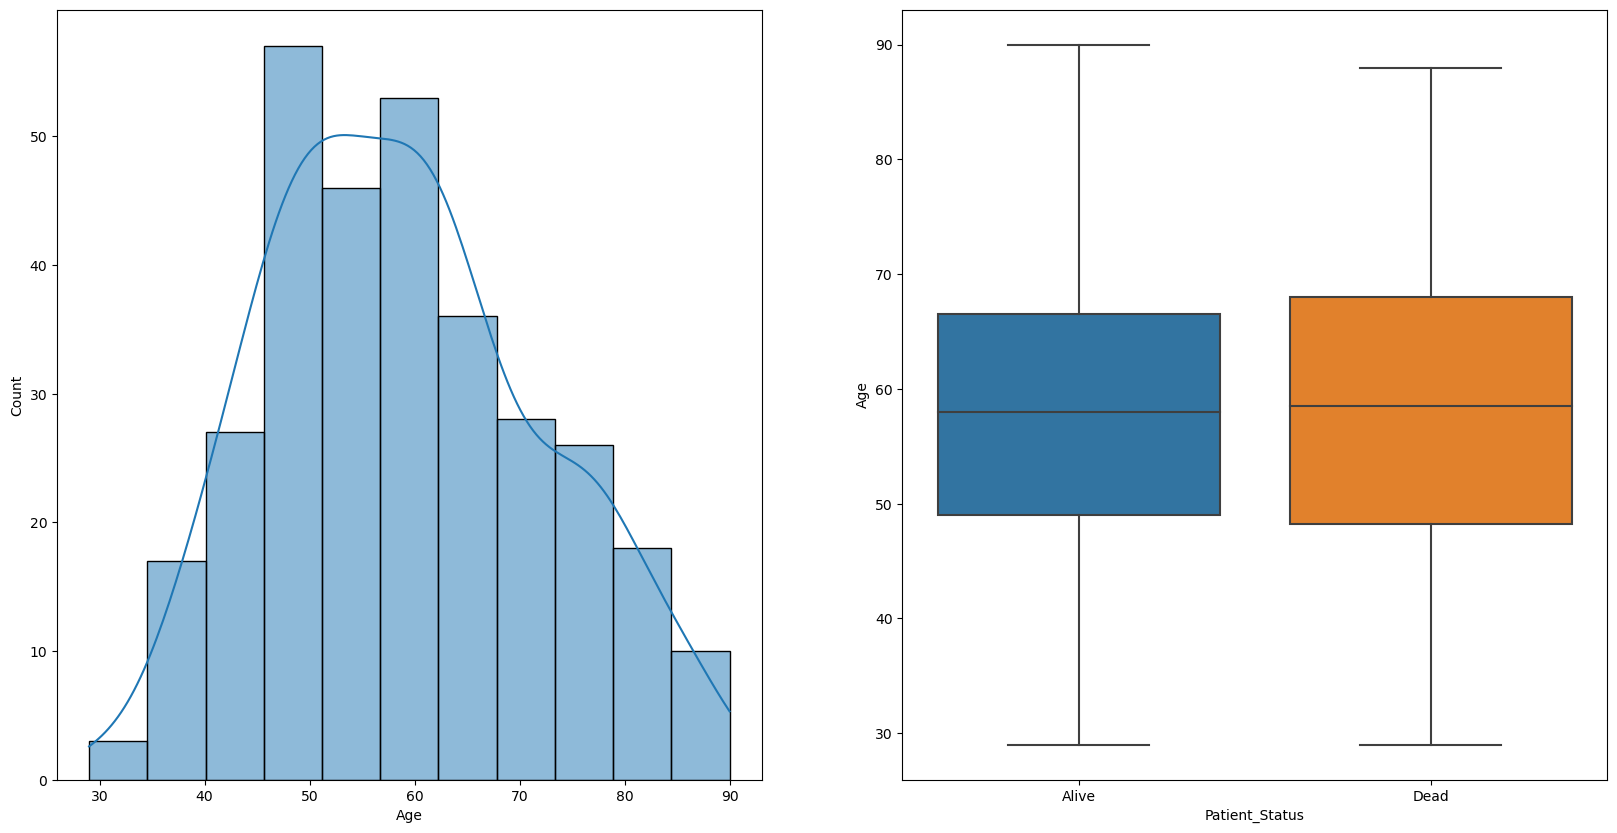

In [6]:
fig,ax = plt.subplots(ncols = 2,nrows = 1,
                     figsize = (20,10))

fig.subplots_adjust(hspace = 0.4)
ax = ax.flatten()
r,t = 0,1

sns.histplot(data=bc_data['Age'],kde = True,ax=ax[r])
sns.boxplot(x='Patient_Status',y='Age',data=bc_data,ax=ax[1])

From comparing the boxplot and histogram, age does not seem to be highly correlated with patient status. The boxplots for both alive, and dead status are similar with minor differences. Further examination and exploration will be needed to confirm this lack of relationship

####   Tumour Stage vs. Patient Status

In [7]:
count_table = bc_data.groupby(['Tumour_Stage', 'Patient_Status']).size().unstack(fill_value=0)
count_table['Total'] = count_table.sum(axis=1)
count_table['Percentage Alive'] = (count_table['Alive'] / count_table['Total'] * 100).round(2)
count_table['Percentage Dead'] = (count_table['Dead'] / count_table['Total'] * 100).round(2)

In [8]:
df = pd.DataFrame(count_table)
df

Patient_Status,Alive,Dead,Total,Percentage Alive,Percentage Dead
Tumour_Stage,,,,,
1,51,10,61,83.61,16.39
2,144,38,182,79.12,20.88
3,60,18,78,76.92,23.08


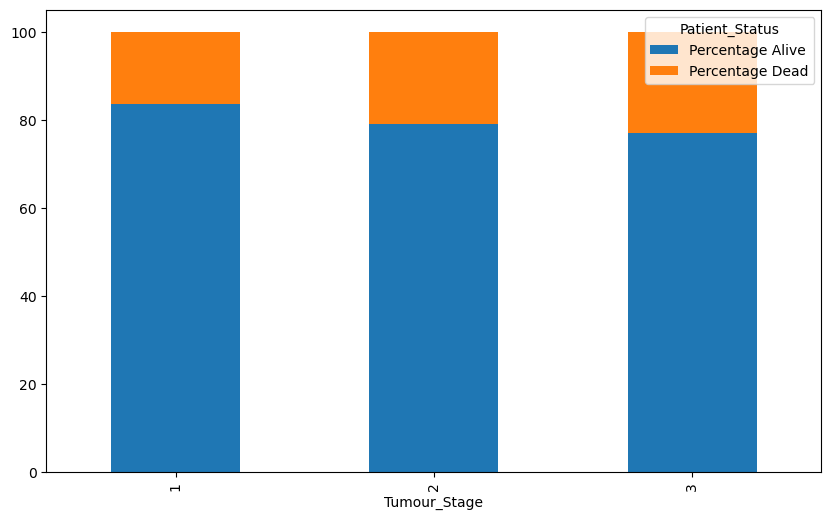

In [9]:
ax = df[['Percentage Alive', 'Percentage Dead']].plot(kind='bar', stacked=True, figsize=(10, 6))

A clear relationship can be seen with patient status and tumour stage. As the tumour stage increases the prognosis for the patient decreases, indicated by the increase in the percentage dead. 

####   Histology vs. Patient Status 

In [10]:
count_table1 = bc_data.groupby(['Histology', 'Patient_Status']).size().unstack(fill_value=0)
count_table1['Total'] = count_table1.sum(axis=1)
count_table1['Percentage Alive'] = (count_table1['Alive'] / count_table1['Total'] * 100).round(2)
count_table1['Percentage Dead'] = (count_table1['Dead'] / count_table1['Total'] * 100).round(2)

In [11]:
count_table1

Patient_Status,Alive,Dead,Total,Percentage Alive,Percentage Dead
Histology,,,,,
Infiltrating Ductal Carcinoma,179,47,226,79.20,20.80
Infiltrating Lobular Carcinoma,67,16,83,80.72,19.28
Mucinous Carcinoma,9,3,12,75.00,25.00


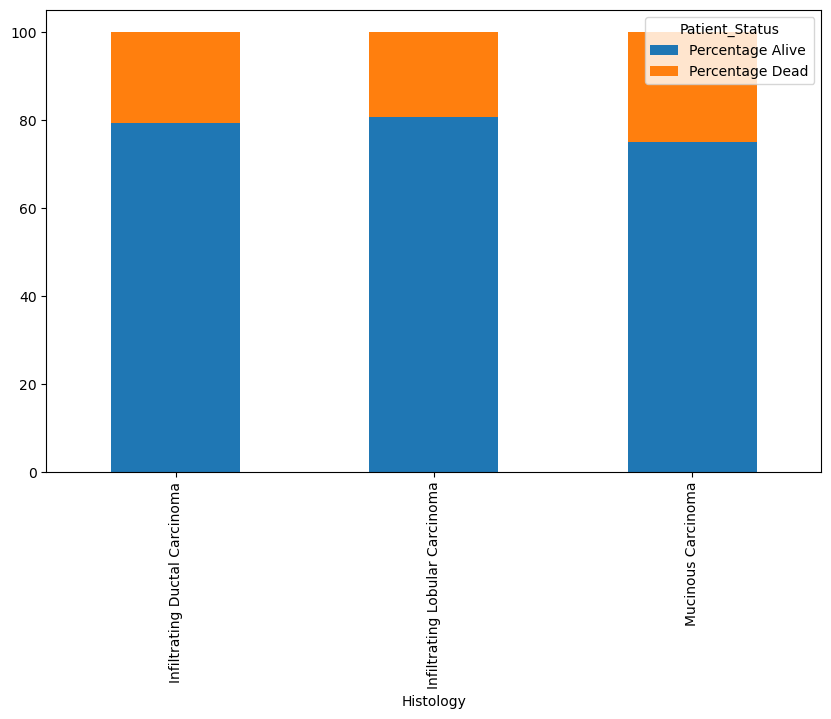

In [12]:
ax = count_table1[['Percentage Alive', 'Percentage Dead']].plot(kind='bar', stacked=True, figsize=(10, 6))

Infiltrating lobular carcinoma has the lowest mortality rate, and mucinous carcinoma has the highest. The mortality of mucinous carcinoma cannot be justified as the dataset only contains 12 patients with that histology. Additionally, infiltrating ductal carcinoma forms the majority, and these levels may be viable to change as the number of patients with that histology increases. 

####   Type of Surgery vs. Patient Status 

In [13]:
count_table2 = bc_data.groupby(['Surgery_type', 'Tumour_Stage','Patient_Status']).size().unstack(fill_value=0)
count_table2['Total'] = count_table2.sum(axis=1)
count_table2['Percentage Alive'] = (count_table2['Alive'] / count_table2['Total'] * 100).round(2)
count_table2['Percentage Dead'] = (count_table2['Dead'] / count_table2['Total'] * 100).round(2)

In [14]:
count_table2

Patient_Status                            Alive  Dead  Total  \
Surgery_type                Tumour_Stage                       
Lumpectomy                  1                20     2     22   
                            2                29     7     36   
                            3                 8     0      8   
Modified Radical Mastectomy 1                 5     2      7   
                            2                38     9     47   
                            3                29     9     38   
Other                       1                16     3     19   
                            2                39    17     56   
                            3                18     5     23   
Simple Mastectomy           1                10     3     13   
                            2                38     5     43   
                            3                 5     4      9   

Patient_Status                            Percentage Alive  Percentage Dead  
Surgery_type                Tumour_Stage                                     
Lumpectomy                  1                        90.91             9.09  
                            2                        80.56            19.44  
                            3                       100.00             0.00  
Modified Radical Mastectomy 1                        71.43            28.57  
                            2                        80.85            19.15  
                            3                        76.32            23.68  
Other                       1                        84.21            15.79  
                            2                        69.64            30.36  
                            3                        78.26            21.74  
Simple Mastectomy           1                        76.92            23.08  
                            2                        88.37            11.63  
                            3                        55.56            44.44

I wanted to see whether the cancer stage was related to the type of surgery, and also see which type of surgery showed the best prognosis, while taking into account the stage of the tumour (which has shown to affect mortality). 

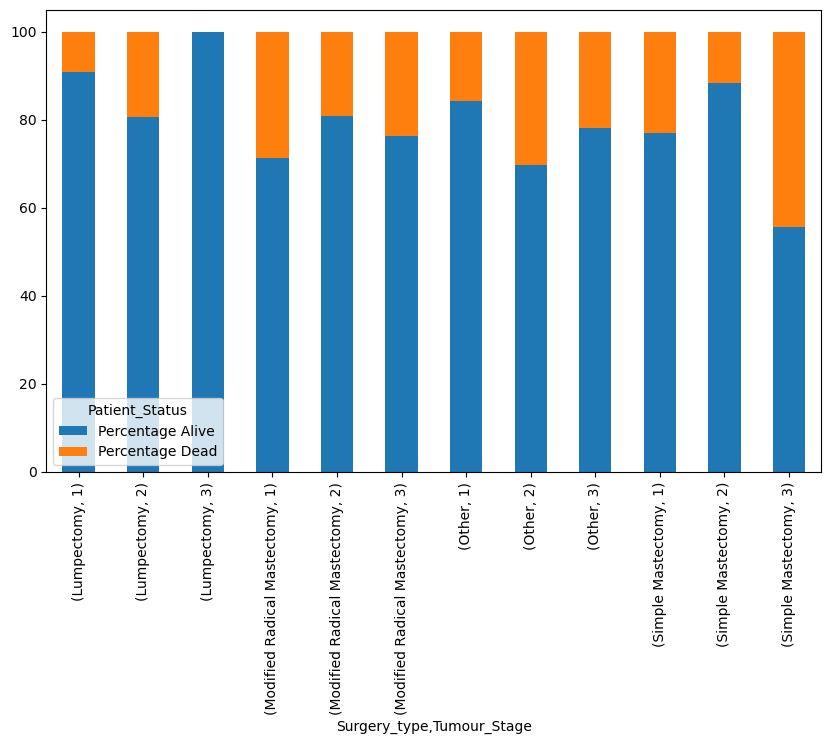

In [15]:
ax = count_table2[['Percentage Alive', 'Percentage Dead']].plot(kind='bar', stacked=True, figsize=(10, 6))

From an examination of the bar graph, lumpectomy show the most promise, especially at stage 1, with 90% of patients still alive after surgery, while mastectomys at stage 3 have the highest mortality rate. The aspect of stage plays an interesting role in this relationship, because within some procedures theres an incerase in mortality as tumour stage increases, while others show a more sporadic pattern. There may be various other factors that go into determining the success of a surgery, including age, receptor status, and etc. 

####   Protein levels vs. Patient Status 

Using box plots, I want to examine the distrubition of specific protein levels and the status of the patient

In [16]:
plevels_vs_status = bc_data[['Protein1','Protein2','Protein3','Protein4','Patient_Status']]
protein_cols = plevels_vs_status.describe().columns

In [17]:
plevels_vs_status.describe()

,Protein1,Protein2,Protein3,Protein4
count,321.000000,321.000000,321.000000,321.000000
mean,-0.026479,0.954563,-0.093279,0.008813
std,0.546689,0.909635,0.587981,0.622491
min,-2.144600,-0.978730,-1.627400,-2.025500
25%,-0.361650,0.368840,-0.531360,-0.378070
50%,0.005649,1.000300,-0.177200,0.040511
75%,0.336530,1.633200,0.275630,0.428860
max,1.593600,3.402200,2.193400,1.629900


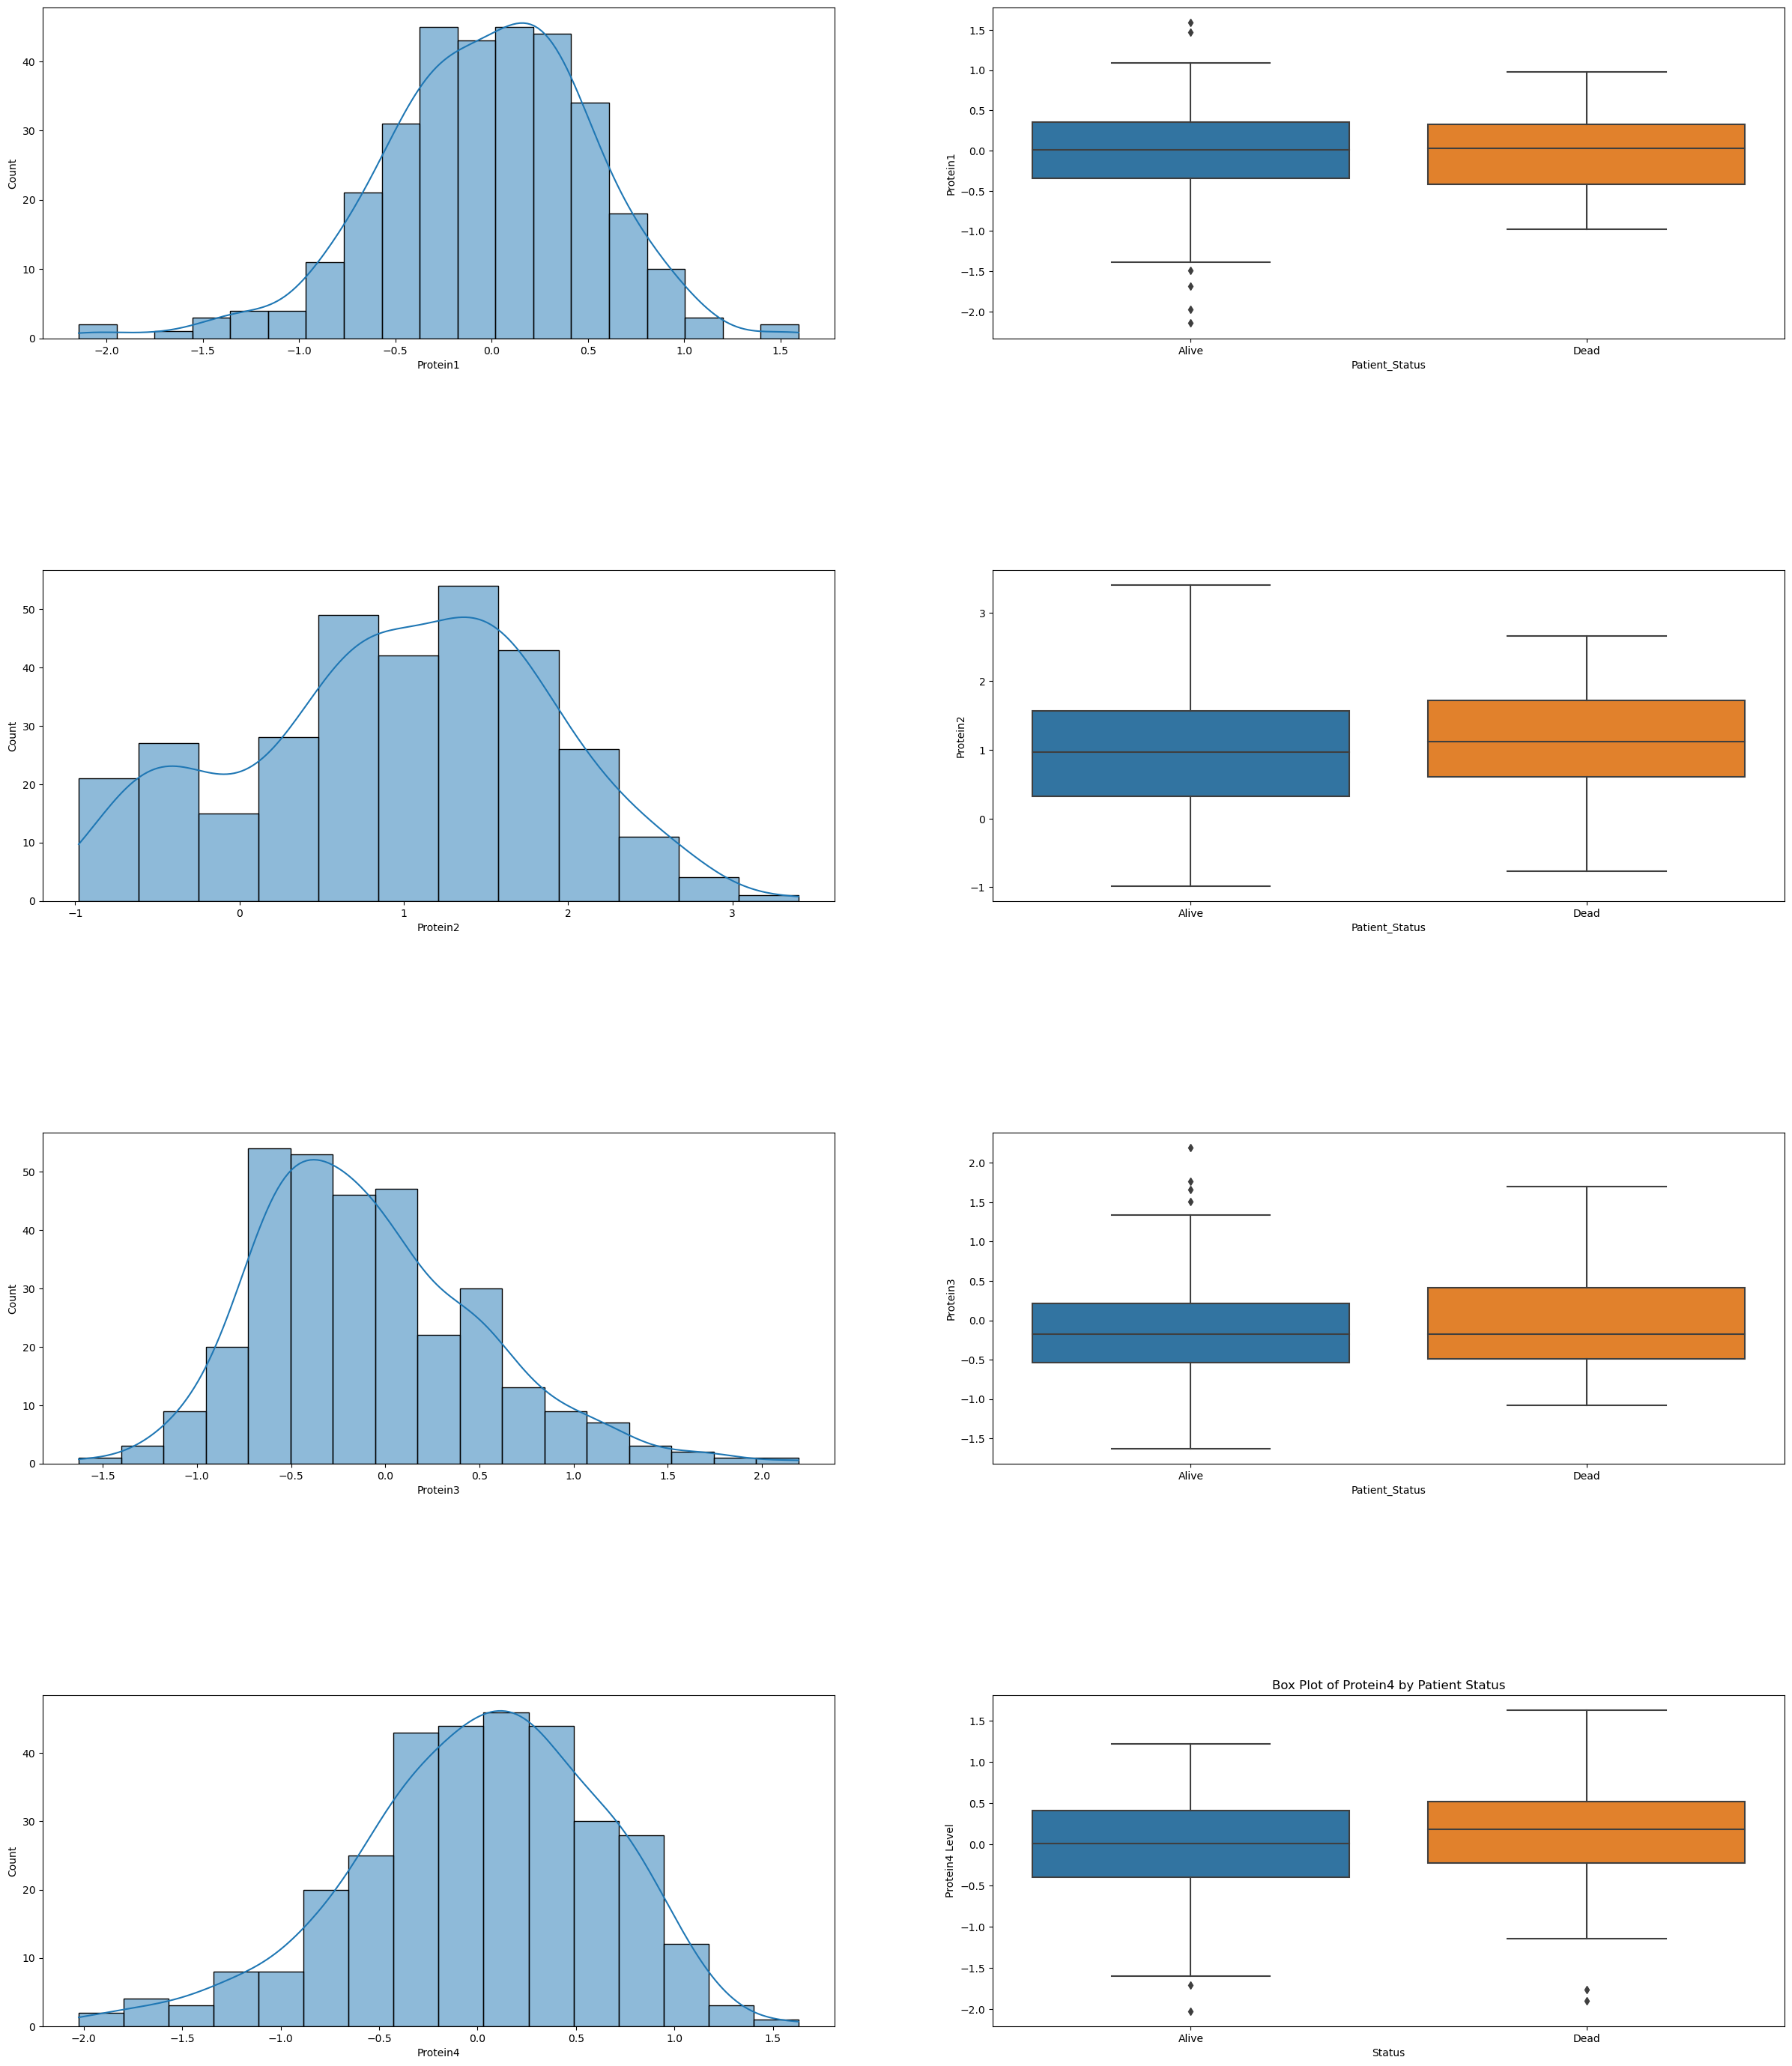

In [18]:
fig,ax = plt.subplots(ncols = 2,nrows = 4,
                     figsize = (30,35))

fig.subplots_adjust(hspace = 0.7)
ax = ax.flatten()

x,y = 0,1

for col in protein_cols:
    sns.histplot(data=plevels_vs_status[col], kde = True, ax = ax[x])
    plt.title(f'Histogram of {col} Levels')
    plt.xlabel(f'{col} Level')
    plt.ylabel('Count')
    
    sns.boxplot(x='Patient_Status',y=col,data=plevels_vs_status, ax = ax[y])
    plt.title(f'Box Plot of {col} by Patient Status')
    plt.xlabel('Status')
    plt.ylabel(f'{col} Level')
    
    x += 2
    y += 2

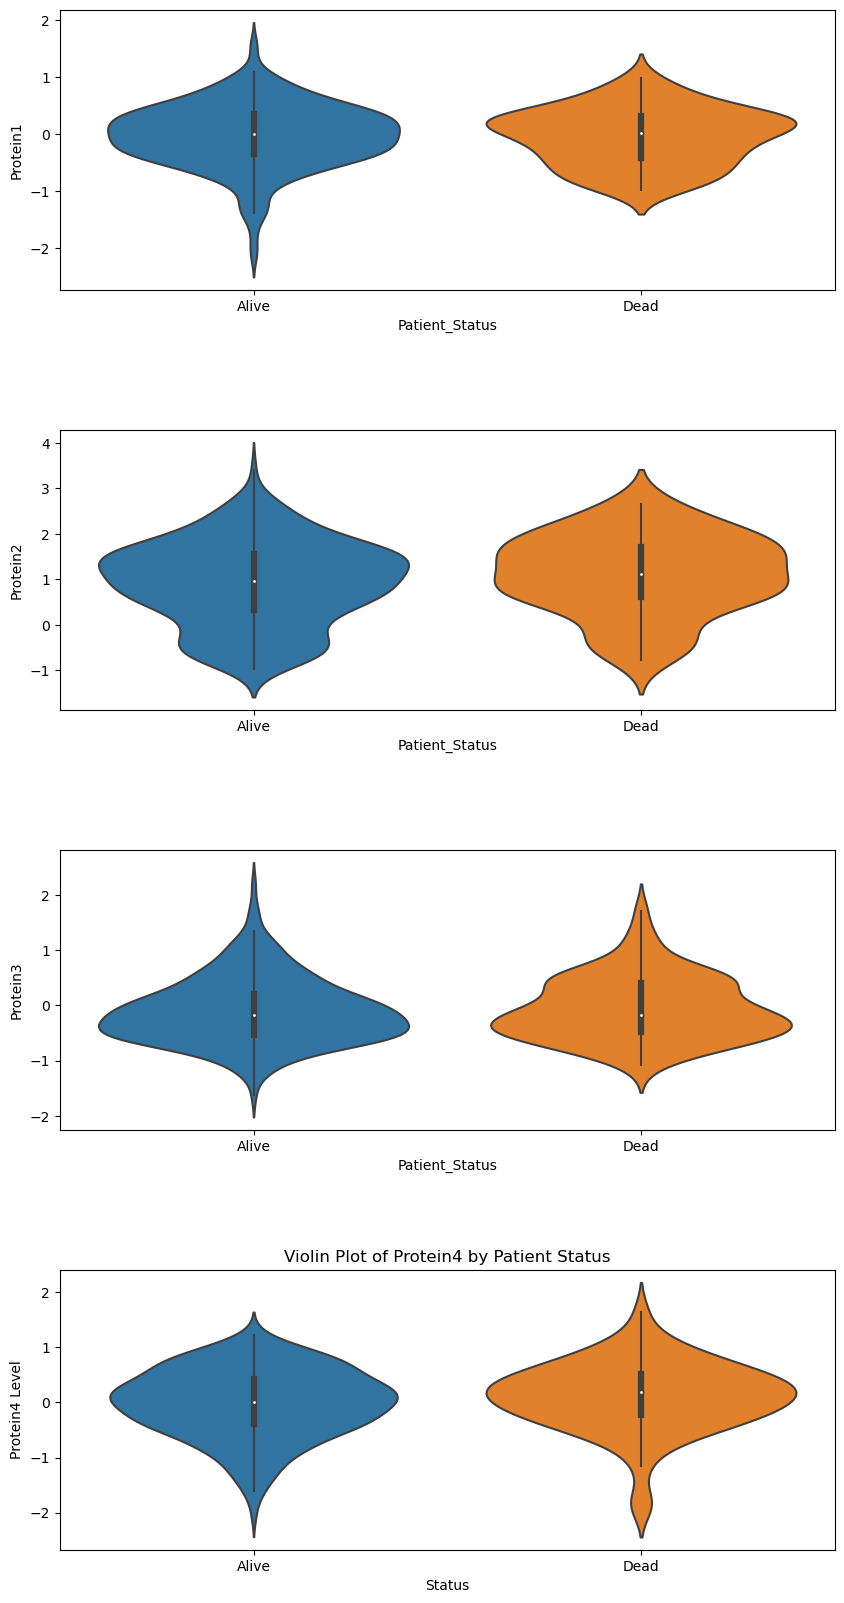

In [19]:
fig,ax = plt.subplots(ncols = 1,nrows = 4,
                     figsize = (10,20))

fig.subplots_adjust(hspace = 0.5)
ax = ax.flatten()

x = 0

for col in protein_cols:   
    sns.violinplot(x='Patient_Status',y=col,data=plevels_vs_status, ax = ax[x])
    plt.title(f'Violin Plot of {col} by Patient Status')
    plt.xlabel('Status')
    plt.ylabel(f'{col} Level')
    
    x += 1

From an initial glance, the boxplots indicate that the protein levels among dead and alive patients do not bear any major differences. The slight differences among the protein levels will be further examined. 

#### Protein Levels vs. Histology

I want to see if there are relationships between the level of proteins and the histology of the breast cancer

In [20]:
plevels_vs_hist = bc_data[['Protein1','Protein2','Protein3','Protein4','Histology']]
protein_cols = plevels_vs_hist.describe().columns
hist_types = plevels_vs_hist['Histology'].unique()

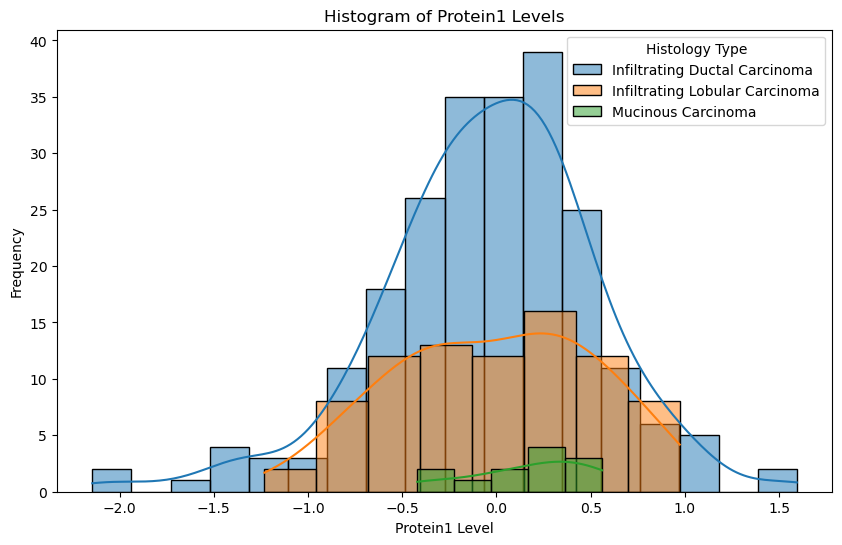

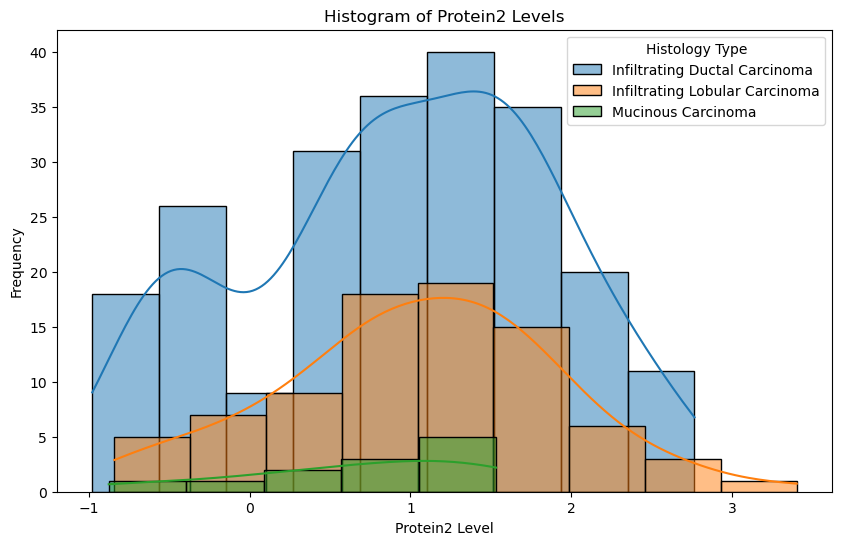

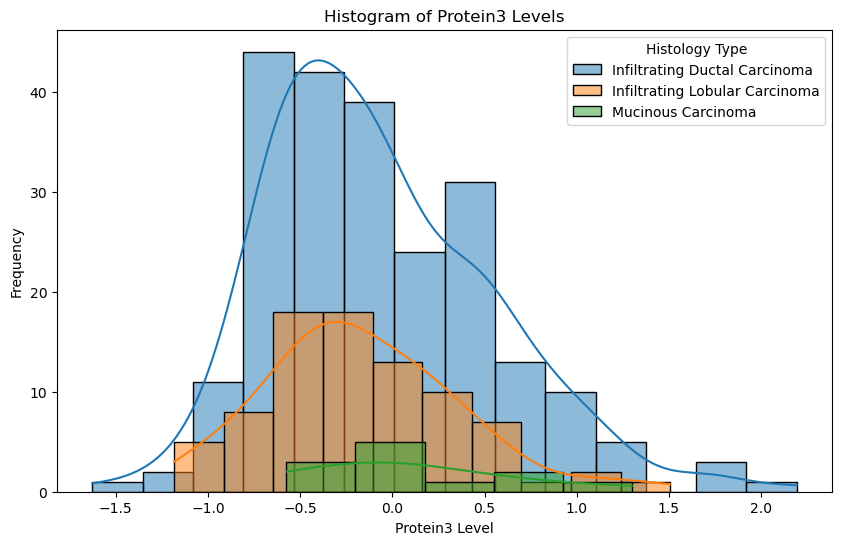

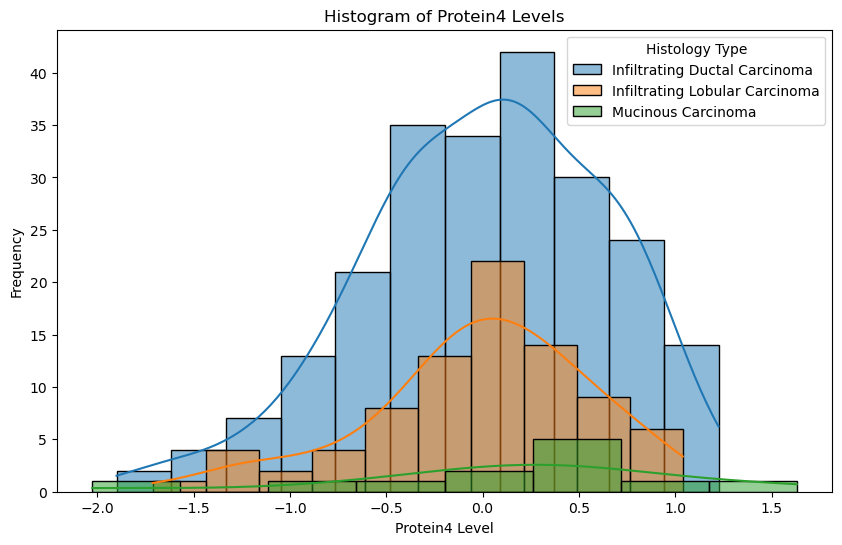

In [21]:
for col in protein_cols:
    plt.figure(figsize=(10, 6))
    
    for hist in hist_types:

        subset =  plevels_vs_hist[plevels_vs_hist['Histology'] == hist][col]
        sns.histplot(data=subset,label=hist, kde = True)
    
    plt.title(f'Histogram of {col} Levels')
    plt.xlabel(f'{col} Level')
    plt.ylabel('Frequency')
    plt.legend(title='Histology Type')

plt.show()

In [22]:
grouped = plevels_vs_hist.groupby('Histology').agg({
    'Protein1': ['mean', 'median', 'std', 'min', 'max'],
    'Protein2': ['mean', 'median', 'std', 'min', 'max'],
    'Protein3': ['mean', 'median', 'std', 'min', 'max'],
    'Protein4': ['mean', 'median', 'std', 'min', 'max']
})

In [23]:
grouped

Protein1                               \
                                    mean    median       std      min   
Histology                                                               
Infiltrating Ductal Carcinoma  -0.042238  0.000000  0.562575 -2.14460   
Infiltrating Lobular Carcinoma -0.012572  0.005649  0.526475 -1.23130   
Mucinous Carcinoma              0.174120  0.285655  0.322509 -0.42032   

                                         Protein2                              \
                                    max      mean   median       std      min   
Histology                                                                       
Infiltrating Ductal Carcinoma   1.59360  0.931683  0.98530  0.935387 -0.97873   
Infiltrating Lobular Carcinoma  0.97251  1.056009  1.11170  0.854089 -0.84140   
Mucinous Carcinoma              0.56042  0.683807  0.80901  0.753623 -0.87612   

                                        Protein3                               \
                                   max      mean    median       std      min   
Histology                                                                       
Infiltrating Ductal Carcinoma   2.7660 -0.075817 -0.170300  0.609934 -1.62740   
Infiltrating Lobular Carcinoma  3.4022 -0.166450 -0.226930  0.524063 -1.18250   
Mucinous Carcinoma              1.5325  0.083965 -0.005073  0.565327 -0.57456   

                                        Protein4                              \
                                   max      mean    median       std     min   
Histology                                                                      
Infiltrating Ductal Carcinoma   2.1934  0.009328  0.046409  0.624162 -1.8993   
Infiltrating Lobular Carcinoma  1.5070 -0.014281 -0.007217  0.571926 -1.7127   
Mucinous Carcinoma              1.2980  0.158838  0.315810  0.914874 -2.0255   

                                        
                                   max  
Histology                               
Infiltrating Ductal Carcinoma   1.2237  
Infiltrating Lobular Carcinoma  1.0386  
Mucinous Carcinoma              1.6299

From examining the histograms and the summary statistics for the protein levels under the different histologies, it can be seen that protein levels vary among the various histologies. This is a relationship I would like to further explore through correlational testing. 

#### ANOVA: Histology and Protein Levels 

Using the ANOVA tests, I will determine there is a significance difference among protein levels for each of the three carcinoma type.


H0: There is no significant variation in protein levels among the three histologies 
H1: There is a significant variation in protein levels among the three histologies

Alpha = 0.05

In [24]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


In [25]:
from scipy.stats import f_oneway

##### Protein 1

In [26]:
groups = [bc_data['Protein1'][bc_data['Histology'] == hist] for hist in bc_data['Histology'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.9281878460403028
P-value: 0.3963375144524637


##### Protein 2

In [27]:
groups = [bc_data['Protein2'][bc_data['Histology'] == hist] for hist in bc_data['Histology'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 1.1200796054192315
P-value: 0.3275374689846172


##### Protein 3

In [28]:
groups = [bc_data['Protein3'][bc_data['Histology'] == hist] for hist in bc_data['Histology'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 1.2899011826125013
P-value: 0.27673439593146637


##### Protein 4

In [29]:
groups = [bc_data['Protein4'][bc_data['Histology'] == hist] for hist in bc_data['Histology'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.4041902071627977
P-value: 0.6678595814958752


There is no significant variation among protein levels for the three histologies. No protein showed a p value that is below the alpha of 0.05.

#### ANOVA: Tumour Stage and Protein Levels 

Using the ANOVA tests, I will determine there is a significance difference among protein levels for each of the three tumour stages.


H0: There is no significant variation in protein levels among the three tumour stages
H1: There is a significant variation in protein levels among the three tumour stages

Alpha = 0.05

##### Protein 1

In [30]:
groups = [bc_data['Protein1'][bc_data['Tumour_Stage'] == stage] for stage in bc_data['Tumour_Stage'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.5240593558516968
P-value: 0.5926225412388975


##### Protein 2

In [31]:
groups = [bc_data['Protein2'][bc_data['Tumour_Stage'] == stage] for stage in bc_data['Tumour_Stage'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.3393824830426576
P-value: 0.7124676332464629


##### Protein 3

In [32]:
groups = [bc_data['Protein3'][bc_data['Tumour_Stage'] == stage] for stage in bc_data['Tumour_Stage'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.4529014521664137
P-value: 0.6361902381002881


##### Protein 4

In [33]:
groups = [bc_data['Protein4'][bc_data['Tumour_Stage'] == stage] for stage in bc_data['Tumour_Stage'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.44896923856415666
P-value: 0.6386896963566887


There is not sufficient evidence to reject the null hypothesis of there being no significant variation among protein levels within the difference stages of the tumour. 

### Survival Time in Months 

In [34]:
bc_data['Date_of_Surgery'] = pd.to_datetime(bc_data['Date_of_Surgery'])
bc_data['Date_of_Last_Visit'] = pd.to_datetime(bc_data['Date_of_Last_Visit'])

In [35]:
bc_data['Survival_Time_Months'] = ((bc_data['Date_of_Last_Visit'] - bc_data['Date_of_Surgery']).dt.days)/30.4

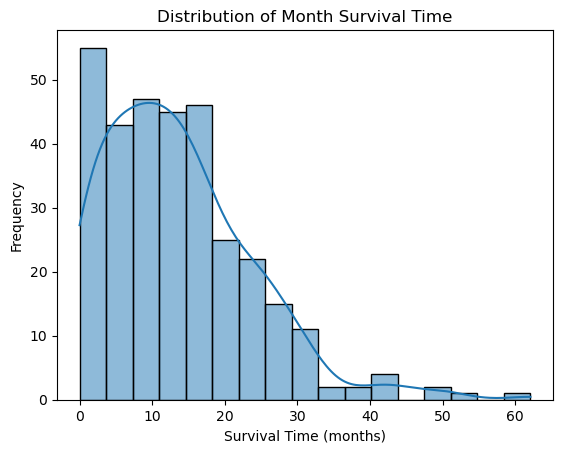

In [36]:
sns.histplot(bc_data['Survival_Time_Months'],kde= True)
plt.title('Distribution of Month Survival Time')
plt.xlabel('Survival Time (months)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Survival Time (months)')

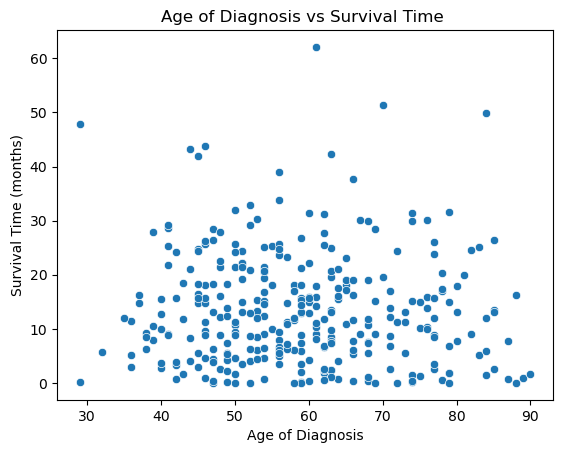

In [37]:
sns.scatterplot(x='Age',y='Survival_Time_Months',data=bc_data)
plt.title('Age of Diagnosis vs Survival Time ')
plt.xlabel('Age of Diagnosis')
plt.ylabel('Survival Time (months)')

In [38]:
from scipy.stats import pearsonr

In [39]:
correlation_age_survivaltime, _ = pearsonr(bc_data['Age'], bc_data['Survival_Time_Months'])
print(correlation_age_survivaltime)

-0.05386374322941522


Text(0, 0.5, 'Survival Time (months)')

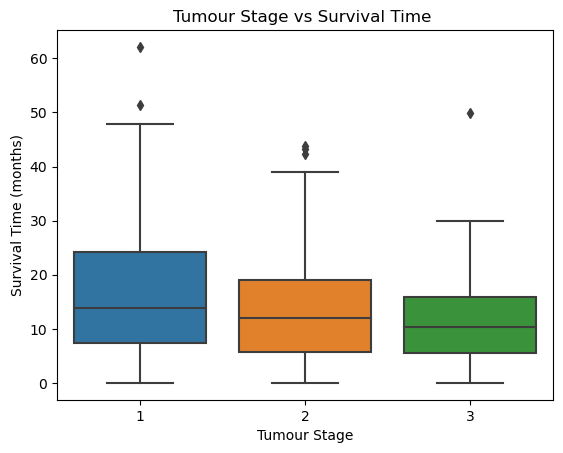

In [40]:
sns.boxplot(x='Tumour_Stage',y='Survival_Time_Months',data=bc_data)
plt.title('Tumour Stage vs Survival Time ')
plt.xlabel('Tumour Stage')
plt.ylabel('Survival Time (months)')

From this boxplot there seems to be a relationship between survival time and the tumour stage. An anova test can further confirm the significance of this relationship. 

(array([0, 1, 2]),
 [Text(0, 0, 'Infiltrating Ductal Carcinoma'),
  Text(1, 0, 'Infiltrating Lobular Carcinoma'),
  Text(2, 0, 'Mucinous Carcinoma')])

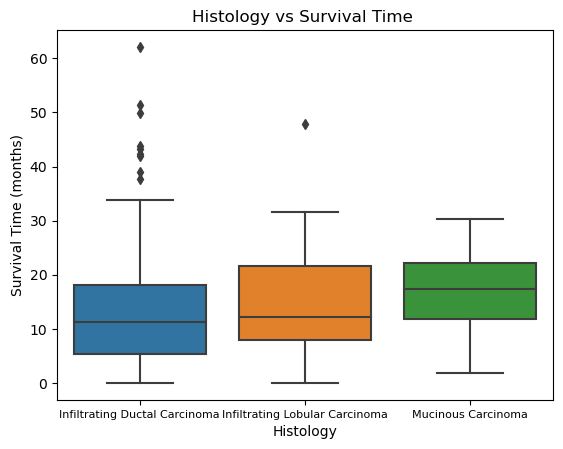

In [41]:
figsize=(10, 20)
sns.boxplot(x='Histology',y='Survival_Time_Months',data=bc_data)
plt.title('Histology vs Survival Time ')
plt.xlabel('Histology')
plt.ylabel('Survival Time (months)')
plt.xticks(fontsize=8)

Again the box plot shows a certain relationship between the histology and the survival time of the patient which can be further explored using anova testing

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Lumpectomy'),
  Text(2, 0, 'Modified Radical Mastectomy'),
  Text(3, 0, 'Simple Mastectomy')])

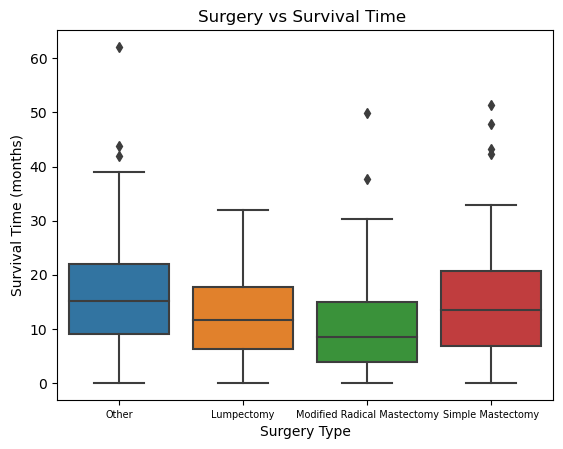

In [42]:
sns.boxplot(x='Surgery_type',y='Survival_Time_Months',data=bc_data)
plt.title('Surgery vs Survival Time ')
plt.xlabel('Surgery Type')
plt.ylabel('Survival Time (months)')
plt.xticks(fontsize=7)

#### ANOVA: survival time and tumour Stage

alpha = 0.05
H0: There is no significant correlation between the stage of tumour and the survival time in months
H1: There is a significant correlation between the stage of tumour and the survival time 

In [43]:
groups = [bc_data['Survival_Time_Months'][bc_data['Tumour_Stage'] == stage] for stage in bc_data['Tumour_Stage'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 3.153490667213645
P-value: 0.04404136056152324


Since the p value is below the assigned alpha there is a significant relationship between tumour stage and the survival time in months, with the survival time decreasing as the tumour stage increases.

#### ANOVA: survival time and Histology

alpha = 0.05
H0: There is no significant correlation between the histology and the survival time in months
H1: There is a significant correlation between the histology and the survival time 

In [44]:
groups = [bc_data['Survival_Time_Months'][bc_data['Histology'] == hist] for hist in bc_data['Histology'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 0.7981577347632335
P-value: 0.4510572110070099


There is not sufficient evidence in rejecting the null that there are no significant differences among survival time within the 3 histologies. 

#### ANOVA: survival time and surgery type

alpha = 0.05
H0: There is no significant correlation between the surgery type and the survival time in months
H1: There is a significant correlation between the surgery type and the survival time 

In [45]:
groups = [bc_data['Survival_Time_Months'][bc_data['Surgery_type'] == surgery] for surgery in bc_data['Surgery_type'].unique()]
f_statistic, p_value = f_oneway(*groups,axis=0)
print("ANOVA Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

ANOVA Results:
F-statistic: 4.999589456778492
P-value: 0.0021138143939906356


Since the p value is below the assigned alpha there is a significant relationship between the type of surgert and the survival time in months.

#### KDE Plot: survival time and surgery type

/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/3261572589.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Survival_Time_Months'], label=surgery, shade=True)
/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/3261572589.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Survival_Time_Months'], label=surgery, shade=True)
/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/3261572589.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Survival_Time_Months'], label=surgery, shade=True)
/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/32

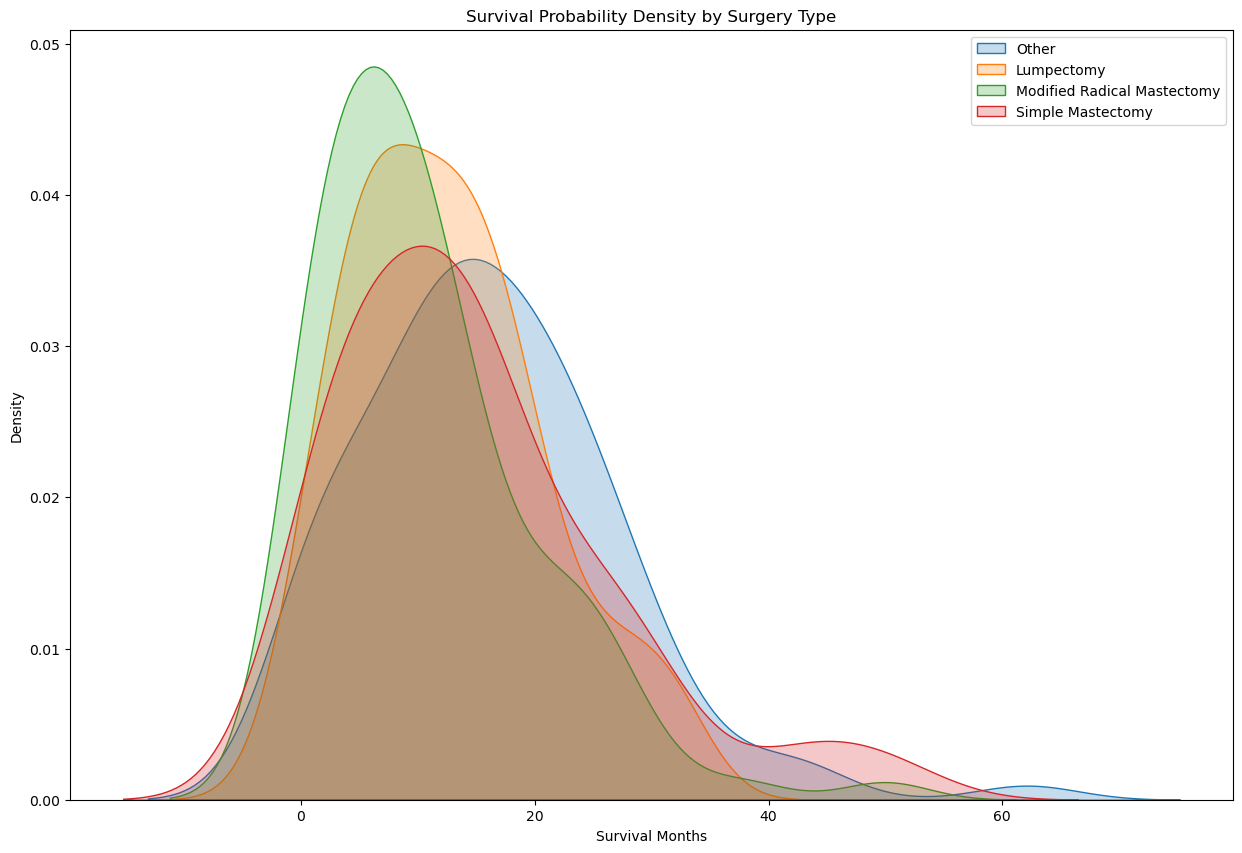

In [46]:
plt.figure(figsize=(15, 10))
surgery_types = bc_data['Surgery_type'].unique()
for surgery in surgery_types:
    subset = bc_data[bc_data['Surgery_type'] == surgery]
    sns.kdeplot(subset['Survival_Time_Months'], label=surgery, shade=True)

# Customize the plot
plt.title('Survival Probability Density by Surgery Type')
plt.xlabel('Survival Months')
plt.ylabel('Density')
plt.legend()

The KDE plot shows how the probability density of survival changes over time for each of the surgery procedures. Through anova testing we determined that there was a significant difference in survival time among the difference surgery types. This kde plot shows that some surgery types have a decreased survivability compared to others. Simple Mastectomys, and other surgery types seem to have better probability outcomes. 

#### KDE Plot: survival time and surgery type

/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/3977082516.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Survival_Time_Months'], label=stage, shade=True)
/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/3977082516.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Survival_Time_Months'], label=stage, shade=True)
/var/folders/jd/jj8ff95d5r9_59zckzpf_vs40000gp/T/ipykernel_95102/3977082516.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset['Survival_Time_Months'], label=stage, shade=True)


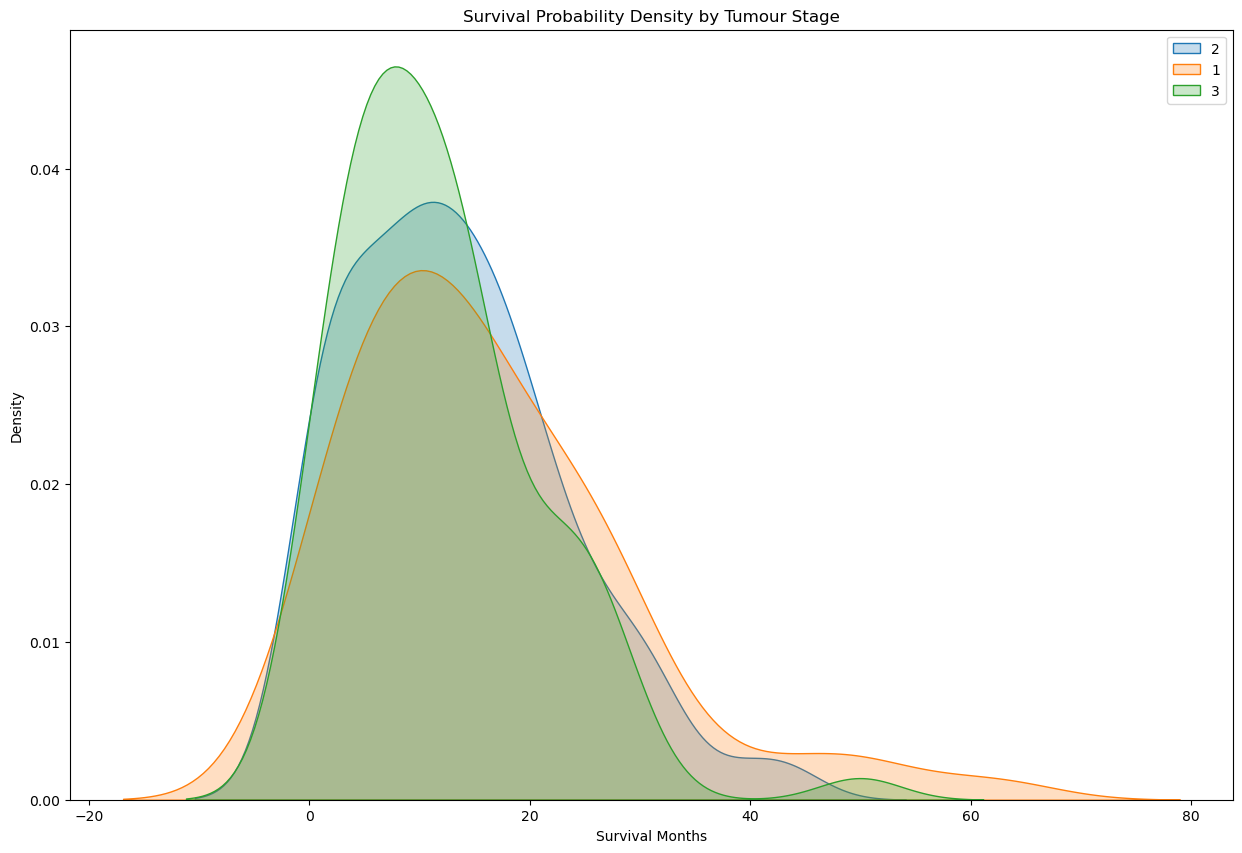

In [47]:
plt.figure(figsize=(15, 10))
Tumour_Stages = bc_data['Tumour_Stage'].unique()
for stage in Tumour_Stages:
    subset = bc_data[bc_data['Tumour_Stage'] == stage]
    sns.kdeplot(subset['Survival_Time_Months'], label=stage, shade=True)

# Customize the plot
plt.title('Survival Probability Density by Tumour Stage')
plt.xlabel('Survival Months')
plt.ylabel('Density')
plt.legend()

The KDE plot shows how the probability density of survival changes over time for each of the tumour stages. Through anova testing we determined that there was a significant difference in survival time among the difference tumour stages. This kde plot shows that certain tumour stages have a decreased survivability compared to others. Stage 1 tumours show the best outcomes while stage 3 tumours show the worst. this phenemenon needs to be further examined through modeling, and taking into account other factors such as surgery types, age, and histology. 

### Final Conclusions

##### Protein Levels

My initial goals were to analyze the relationships between protein levels with prognosis (survival time), and with the histologies. Through ANOVA testing and visualization it was determined that protein levels do not have a significant association with either of those variables. Protein levels seem to be sporadic among the different histologies, and also do not play a significant predictive role in determining prognosis

##### Tumour Stage

Through boxplot visualization and ANOVA testing it was determined that survival time has a significant variation among the different tumour stages. The KDE plot indicated that an increase in tumour stage leads to worse outcomes. This information can be buttressed by external resaerch which indicates that an increase in tumour stages is a growth in the cancer, worsening of symptoms, and worsening of outcomes. In the later stages of preprocessing and modeling, the tumour stage will be taking into accout in building the predictive model for prognosis. 

##### Surgery Type

Through boxplot visualization and ANOVA testing it was determined that survival time had a significant variation among the various surgery types. The KDE plot indicated that certain surgeries such as modified radical mastectomys showed lowered survivability through time compared to others. The surgery type will be another factor that will be included in the preprocessing and modeling stages in building the predictive model of prognosis

In [51]:
datapath = '/Users/sharanaravindh/Desktop/springboard/Github repository/Capstone-Project-1-Breast-Cancer-Prognosis/Data'
save_file(bc_data,'breast_cancer_EDA.csv',datapath)

Writing file.  "/Users/sharanaravindh/Desktop/springboard/Github repository/Capstone-Project-1-Breast-Cancer-Prognosis/Data/breast_cancer_EDA.csv"
